Setup

In [286]:
import pandas as pd

df=pd.read_csv("Mall_Customers.csv",index_col="CustomerID")
print(df.shape)
df.head()

(200, 4)


,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


Remove Duplicates if any

In [287]:
df.drop_duplicates()
print(df.shape)
df.info()
df.describe()

(200, 4)
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


lets scale the data first

In [288]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()
X=df[["Annual Income (k$)","Spending Score (1-100)"]]
X_scaled=scalar.fit_transform(X)
X

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


In [289]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

wcss


[269981.28,
 183811.28277016422,
 132162.13629759202,
 73880.64496247197,
 44448.45544793371,
 37455.984555160285,
 32210.610718359654,
 29862.983256678934,
 26334.255472543275,
 24541.263600206235]

We will plot the Wcss to determine the best number of clusters

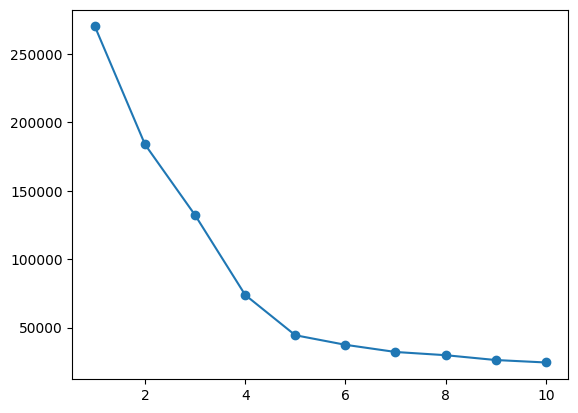

In [290]:
import matplotlib.pyplot as plt

plt.plot(range(1,11,1),wcss,marker="o")

Now we can see that the ideal number of clusters is `5` so we will build a Model based on that

In [291]:
kmeans=KMeans(n_clusters=5,init="k-means++")
y_kmeans=kmeans.fit_predict(X)
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [292]:
df["Clustered_Col"]=y_kmeans
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clustered_Col
CustomerID,,,,,
1,Male,19,15,39,4
2,Male,21,15,81,3
3,Female,20,16,6,4
4,Female,23,16,77,3
5,Female,31,17,40,4


Validated results using `Silhouette Score`

In [293]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X,df["Clustered_Col"]) 
score #Fair clustering :)

0.553931997444648

Now scatter Plot TIME

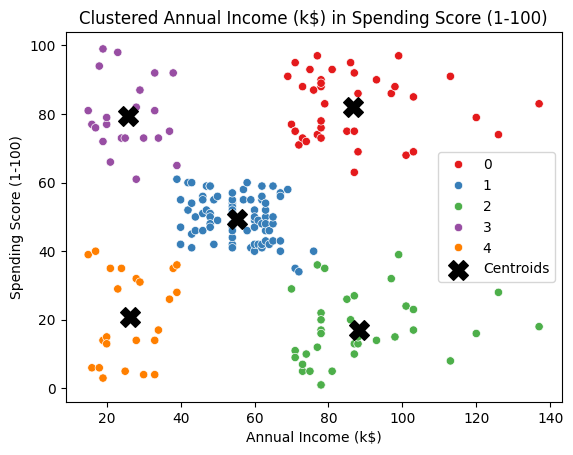

In [294]:
import seaborn as sns

sns.scatterplot(x=df["Annual Income (k$)"],y=df["Spending Score (1-100)"],hue=df["Clustered_Col"],palette="Set1")
plt.title("Clustered Annual Income (k$) in Spending Score (1-100)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="black", marker="X", s=200, label="Centroids")
plt.legend()

plt.show()

Cluster Summary

In [295]:
cluster_summary = df.groupby("Clustered_Col")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
cluster_summary

,Annual Income (k$),Spending Score (1-100)
Clustered_Col,,
0,86.538462,82.128205
1,55.296296,49.518519
2,88.200000,17.114286
3,25.727273,79.363636
4,26.304348,20.913043


Cluster `0` --> moderate Income with Moderate Spending (**Represents the stable customer base of the mall**)  
Cluster `1` --> Low Income with High Spending (**Attracted by discounts, can be targeted during promotions.**)  
Cluster `2` --> High Income with High Spending (**Our Target Customers**)  
Cluster `3` --> High Income with Low Spending (**These customers have money but don’t spend much in the mall.**)  
Cluster `4` --> Low Income with Low Spending (**These are budget customers with limited contribution to revenue**) 

Now we Will try Clustering Using `DBSCAN`

In [296]:
from sklearn.cluster import DBSCAN

db=DBSCAN(eps=10, # Two customers are considered neighbors if they are within distance 10 units
          min_samples=5 # at least 5 customers within radius eps=10 are needed to form a cluster ---> If it has enough neighbors, it becomes a core point of a cluster
          ).fit(X)

df["DBSCAN Clusters"]=db.labels_

df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clustered_Col,DBSCAN Clusters
CustomerID,,,,,,
1,Male,19,15,39,4,0
2,Male,21,15,81,3,0
3,Female,20,16,6,4,1
4,Female,23,16,77,3,0
5,Female,31,17,40,4,0
...,...,...,...,...,...,...
196,Female,35,120,79,0,-1
197,Female,45,126,28,2,-1
198,Male,32,126,74,0,-1


Note that -1 Considered as a noise point cluster if eps is so small

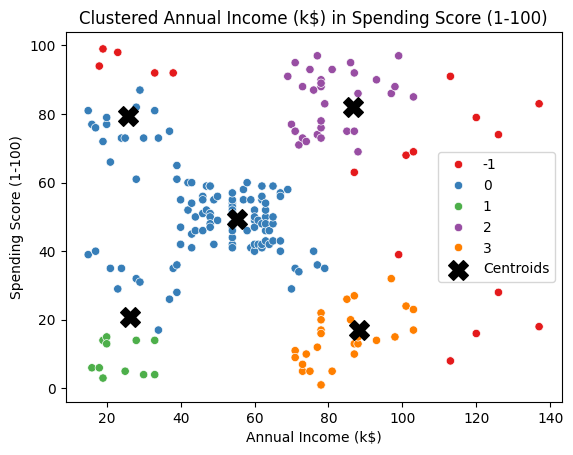

In [297]:
sns.scatterplot(x=df["Annual Income (k$)"],y=df["Spending Score (1-100)"],hue=df["DBSCAN Clusters"],palette="Set1")
plt.title("Clustered Annual Income (k$) in Spending Score (1-100)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="black", marker="X", s=200, label="Centroids")
plt.legend()

plt.show()

Summary For `DBSCAN` Clustering

In [298]:
cluster_summary = df.groupby("DBSCAN Clusters")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
cluster_summary

,Annual Income (k$),Spending Score (1-100)
DBSCAN Clusters,,
-1,89.000000,65.352941
0,48.530973,51.017699
1,23.727273,8.909091
2,80.875000,83.625000
3,83.925926,14.444444
